# MVN DATA & ANALYTICS TASKS 

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import importlib
import graph_analysis_functions as gaf
importlib.reload(gaf)




# abre el archivo en modo lectura binaria
#with open(r"C:\Users\Ana\OneDrive\Escritorio\ARTORG\igraph\half brain scripts\18_igraph_CUT_SomatomotorArea.pkl", "rb") as f:
#    data = pickle.load(f)

# Tortuous graph (outgeom) has graph + global arrays of points (need to access the graph)
data = gaf.load_graph(
    r"C:\Users\Ana\OneDrive\Escritorio\ARTORG\igraph\half brain scripts\18_igraph_CUT_SomatomotorArea.pkl"
)

# Ver tipo de objeto
print(type(data))
print(data.vs.attributes())  # Muestra las aristas del grafo
print(data.es.attributes())  # Muestra los nodos del grafo

vessel_type = {
    2: "arteriole",
    3: "venule",
    4: "capillary"
}



<class 'igraph.Graph'>
['id', 'coords', 'annotation', 'distance_to_surface', 'radii', 'degree']
['connectivity', 'nkind', 'radius', 'diameter', 'length']


## 1) SINGLE CONNECTED COMPONENT

In [9]:
if data.is_connected():
    print("The graph is a single connected component")
else:
    print("The graph has more than one component")
    
components = data.components()  # returns a VertexClustering object
print("Number of connected components:", len(components))

# Useful for detecting isolated nodes or unconnected subsets 
for i, comp in enumerate(components):
    print(f"Component {i} has {len(comp)} nodes")


The graph is a single connected component
Number of connected components: 1
Component 0 has 94363 nodes


## 2) EDGES FOR EACH NKIND

Type of edge (Option B):
 - arteriole, 2, Count: 3066
 - venule, 3, Count: 1823
 - capillary, 4, Count: 133223


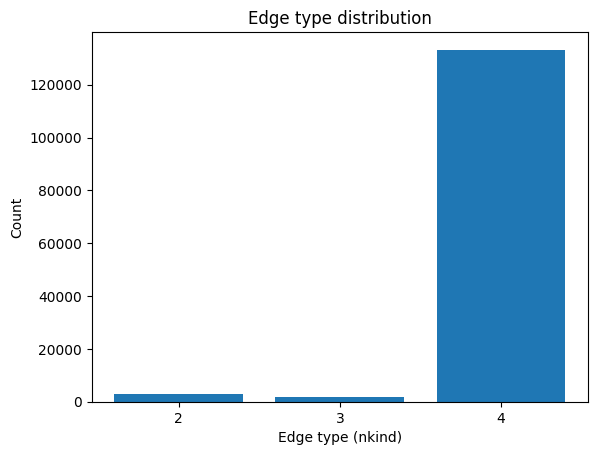

In [10]:

edge_types = data.es["nkind"]

# OPTION A: use sets to get unique types
#unique_edge_types = set(edge_types)
#print("Types of unique edges (option A):", unique_edge_types)

# OPTION B: use numpy to get unique types and counts
print("Type of edge (Option B):")
unique, counts = np.unique(edge_types, return_counts=True)
for i, n in zip(unique, counts):
    print(f" - {vessel_type[i]}, {i}, Count: {n}")
    
plt.bar(unique, counts)

plt.title("Edge type distribution")
plt.xlabel("Edge type (nkind)")
plt.ylabel("Count")
plt.xticks(unique)
plt.show()
    

In [11]:

import importlib

import graph_analysis_functions as gaf
importlib.reload(gaf)

gaf.get_edges_types(data)


Edge types:

 - arteriole, 2, Count: 3066
 - venule, 3, Count: 1823
 - capillary, 4, Count: 133223


# 3) MEAN DIAMETER FOR EACH NKIND

There are two options: A) using diameters and computing the mean B) directly using attribute diameter

nkind = 2: average diameter = 12.046269 μm
nkind = 3: average diameter = 14.124978 μm
nkind = 4: average diameter = 6.967227 μm


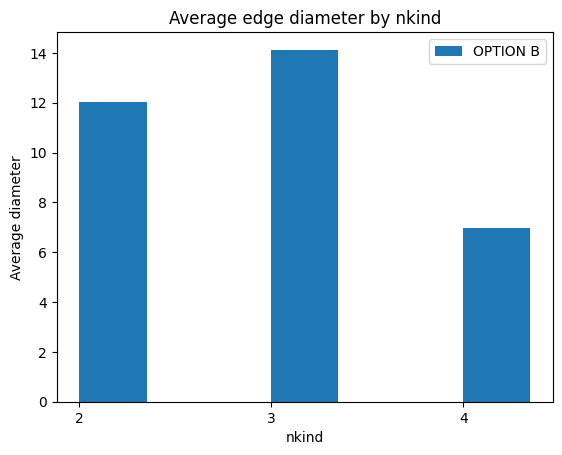

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#print("Example diameters from file", data.es["diameters"][:2])  # first edge diameters (array of 3 values)
#print("Example of diameter from file: ", data.es["diameter"][:5])   # first 5 edges diameter (single value)
#print("Example of nkind from file: ", data.es["nkind"][:5])

# np.float(...) is deprecated, only useful with individual values, not lists/arrays

'''
# OPTION A: use diameters array and compute mean for each edge
# diam_edge = np.array([np.mean(d) for d in data.es["diameters"]])

# # classify by nkind
# nkind = np.array(data.es["nkind"])

# for k in np.unique(nkind):
#     mean_d = diam_edge[nkind == k].mean()
#     print(f"OPTION A: nkind = {k}: average diameter = {mean_d:.6e}")
# ------------------------------------------------------------------------------

'''
# ===========================================
# OPTION B: use diameter attribute directly
# ===========================================

diam_edge_att = np.array(data.es["diameter"])
# classify by nkind
nkind = np.array(data.es["nkind"])

for k in np.unique(nkind):
    mean_d = diam_edge_att[nkind == k].mean()
    print(f"nkind = {k}: average diameter = {mean_d:.6f} μm")

# --- Plot ---
unique_k = np.unique(nkind)

# OPTION A 
#mean_a = [diam_edge[nkind == k].mean() for k in unique_k]

# OPTION B
mean_b = [diam_edge_att[nkind == k].mean() for k in unique_k]

x = np.arange(len(unique_k))
width = 0.35

#plt.bar(x - width/2, mean_a, width, label='OPTION A')
plt.bar(x + width/2, mean_b, width, label='OPTION B')

plt.xticks(x, unique_k)
plt.xlabel("nkind")
plt.ylabel("Average diameter")
plt.title("Average edge diameter by nkind")
plt.legend()
plt.show()

# Error
#mean_error = np.mean(np.abs(diam_edge - diam_edge_att))
#print(f"Error promedio: {mean_error:.2e}")


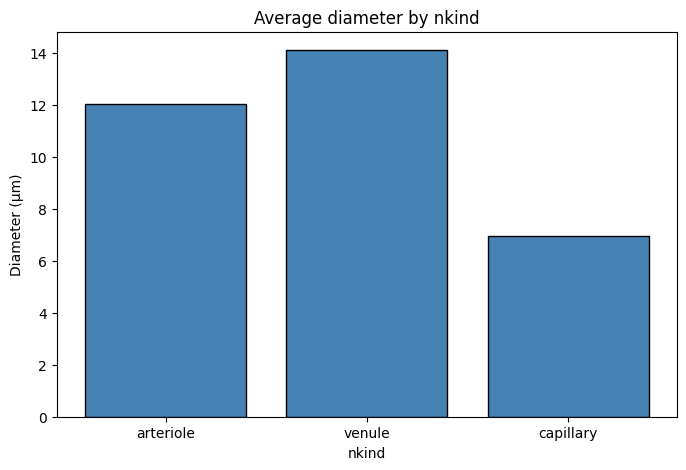

In [13]:
gaf.plot_category_stats(categ=unique_k, attribute_toplot=mean_b, label_dict=vessel_type, xlabel="nkind", ylabel="Diameter (µm)", title="Average diameter by nkind")

Hystogram


[ 2.          2.3652468   2.7304936   3.0957404   3.4609872   3.826234
  4.1914808   4.5567276   4.9219744   5.2872212   5.65246801  6.01771481
  6.38296161  6.74820841  7.11345521  7.47870201  7.84394881  8.20919561
  8.57444241  8.93968921  9.30493601  9.67018281 10.03542961 10.40067641
 10.76592321 11.13117001 11.49641681 11.86166361 12.22691041 12.59215722
 12.95740402 13.32265082 13.68789762 14.05314442 14.41839122 14.78363802
 15.14888482 15.51413162 15.87937842 16.24462522 16.60987202 16.97511882
 17.34036562 17.70561242 18.07085922 18.43610602 18.80135282 19.16659962
 19.53184642 19.89709323 20.26234003 20.62758683 20.99283363 21.35808043
 21.72332723 22.08857403 22.45382083 22.81906763 23.18431443 23.54956123
 23.91480803 24.28005483 24.64530163 25.01054843 25.37579523 25.74104203
 26.10628883 26.47153563 26.83678244 27.20202924 27.56727604 27.93252284
 28.29776964 28.66301644 29.02826324 29.39351004 29.75875684 30.12400364
 30.48925044 30.85449724]
[10.         10.30080868 10

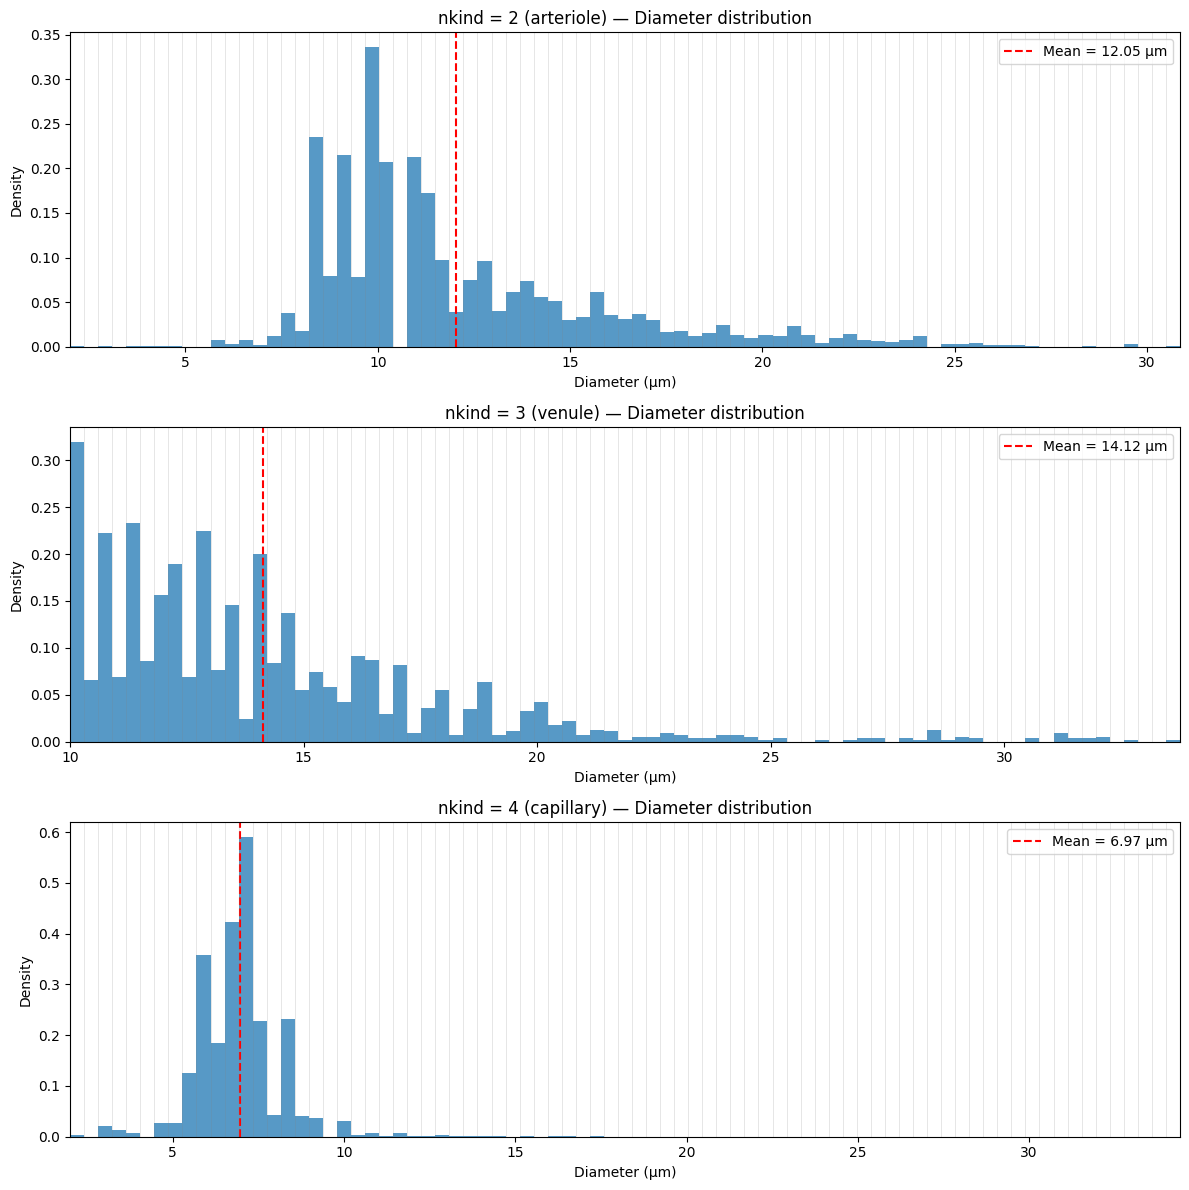

In [14]:
unique_k = np.unique(nkind)

plt.figure(figsize=(12, 4 * len(unique_k)))

for i, k in enumerate(unique_k, 1):
    plt.subplot(len(unique_k), 1, i)
    
    subset = diam_edge_att[nkind == k]

    # bins adapted to the real range of each nkind --> all intervals have same width (79 points)
    bins = np.linspace(subset.min(), subset.max(), 80) 
    print(bins)
    mean_value = subset.mean()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5)
  
    #matplotlib uses the bins to group the data, but select its own ticks for the x-axis. They don't necessarily match the bin edges.
    plt.hist(subset, bins=bins, alpha=0.75, density=True)
   

    for b in bins:
        plt.axvline(b, color='gray', alpha=0.2, linewidth=0.7)

    plt.xlim(subset.min(), subset.max())

    vessel_name = vessel_type.get(k, "Unknown")
    plt.title(f"nkind = {k} ({vessel_name}) — Diameter distribution")

    plt.xlabel("Diameter (µm)")
    plt.ylabel("Density")
    plt.legend([f"Mean = {mean_value:.2f} µm"])

plt.tight_layout()
plt.show()


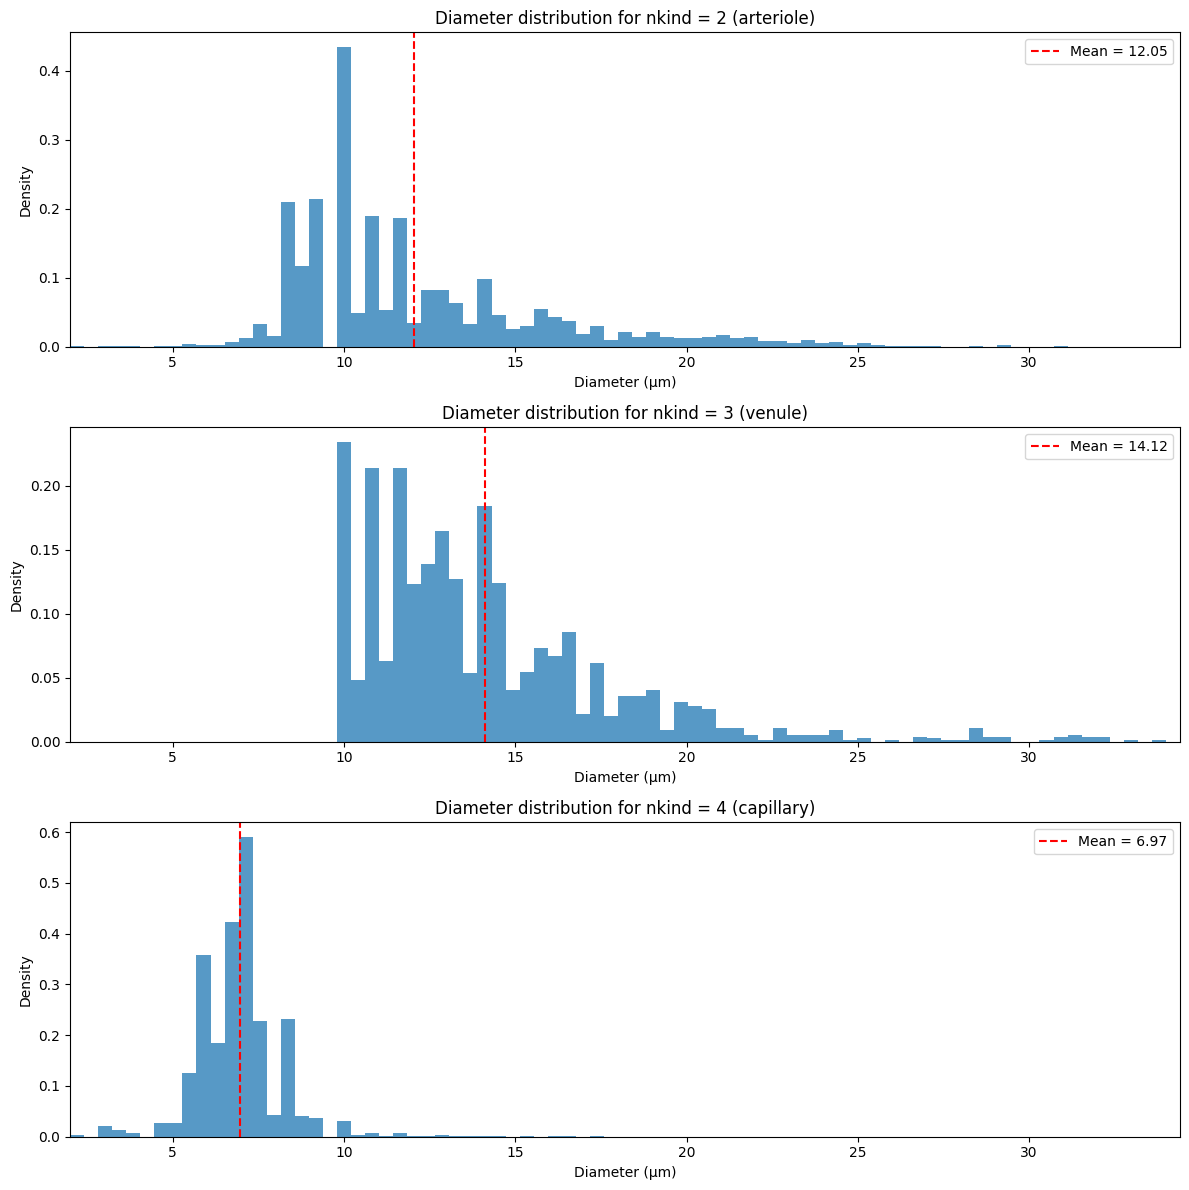

In [15]:
gaf.plot_histograms_by_category(attribute_toplot=np.array(data.es["diameter"]), category=np.array(data.es["nkind"]), label_dict=vessel_type, xlabel="Diameter (µm)", plot_title="Diameter distribution for nkind =")

Statistics and % phisiological range

In [16]:
import numpy as np

diam = np.array(data.es["diameter"])
nkind = np.array(data.es["nkind"])

label_dict = {2: "Artery", 3: "Vein", 4: "Capillary"}

# Tipical physiological diameter ranges (in µm)
ranges = {
    2: (8, 15),    # arterioles
    3: (10, 20),   # venules
    4: (4, 7)      # capillaries
}

print("\n=== Diameter statistics and physiological checks ===\n")

for k in np.unique(nkind):
    subset = diam[nkind == k]
    vname = label_dict.get(k, "Unknown")

    # statistics
    mean = subset.mean()
    median = np.median(subset)
    p5 = np.percentile(subset, 5)
    p95 = np.percentile(subset, 95)

    # physiological range check
    low, high = ranges[k]
    perc_in_range = np.mean((subset >= low) & (subset <= high)) * 100

    print(f"{vname} (nkind={k}):")
    print(f"  Mean diameter:     {mean:.2f} µm")
    print(f"  Median diameter:   {median:.2f} µm")
    print(f"  P5–P95 range:      {p5:.2f} – {p95:.2f} µm")
    print(f"  % in normal range ({low}–{high} µm): {perc_in_range:.1f}%")
    print()



=== Diameter statistics and physiological checks ===

Artery (nkind=2):
  Mean diameter:     12.05 µm
  Median diameter:   10.77 µm
  P5–P95 range:      8.25 – 20.40 µm
  % in normal range (8–15 µm): 79.0%

Vein (nkind=3):
  Mean diameter:     14.12 µm
  Median diameter:   13.11 µm
  P5–P95 range:      10.00 – 20.78 µm
  % in normal range (10–20 µm): 92.9%

Capillary (nkind=4):
  Mean diameter:     6.97 µm
  Median diameter:   6.93 µm
  P5–P95 range:      5.66 – 8.94 µm
  % in normal range (4–7 µm): 56.1%



# 4) Average length for each vessel type

This first code takes both lengths (tortuous) and lenght (non-tortuous). 
In case of array of lenghts this code can be used. In case of only having one, use option B (see below)
Both use same attributes, so the histogram and plot is the same for both, only difference is how lenghts is obtained

Example data of length from file [np.float64(28.0), np.float64(38.0), np.float64(8.0), np.float64(30.0), np.float64(31.0), np.float64(17.0), np.float64(29.0), np.float64(17.0), np.float64(11.0), np.float64(5.0)]
Example data of nkind from file [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
OPTION B:
nkind = 2: average length (att) = 18.729289 μm
nkind = 3: average length (att) = 15.475041 μm
nkind = 4: average length (att) = 21.726751 μm


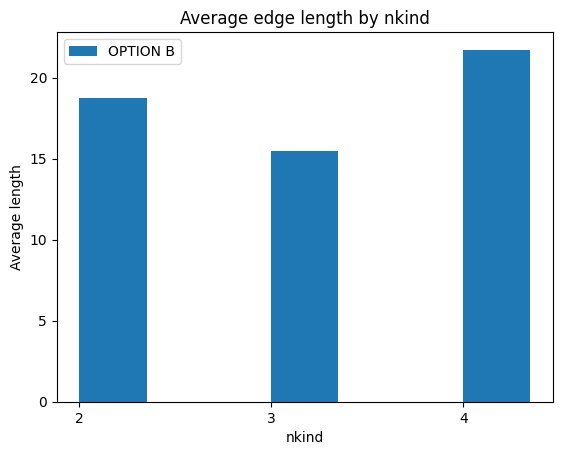

In [17]:
import numpy as np
import matplotlib.pyplot as plt


#print("Example data of lengths from file", data.es["lengths"][:2])  # first length arrays (3 numbers per edge)
print("Example data of length from file", data.es["length"][100:110])   # first 2 mean lengths
print("Example data of nkind from file", data.es["nkind"][100:110])   # first 2 mean lengths

# ------------------------------------------------------------------------------
# OPTION A: use lengths array and compute total length for each edge
#lengths_edges = np.array([np.sum(l) for l in data.es["lengths"]])

# classify by nkind
#nkind = np.array(data.es["nkind"])

#for k in np.unique(nkind):
#    mean_l = lengths_edges[nkind == k].mean()
#    print(f"OPTION A: nkind = {k}: average length = {mean_l:.6e}")
# ------------------------------------------------------------------------------


# OPTION B: use length attribute directly
length_att = np.array(data.es["length"])
# classify by nkind
nkind = np.array(data.es["nkind"])

print("OPTION B:")
for k in np.unique(nkind):
    mean_l = length_att[nkind == k].mean()
  
    print(f"nkind = {k}: average length (att) = {mean_l:.6f} μm")

# Plot
unique_k = np.unique(nkind)
#mean_a = [lengths_edges[nkind == k].mean() for k in unique_k]
mean_b = [length_att[nkind == k].mean() for k in unique_k]


x = np.arange(len(unique_k))
width = 0.35

#plt.bar(x - width/2, mean_a, width, label='OPTION A')
plt.bar(x + width/2, mean_b, width, label='OPTION B')

# To show in scientific notation
plt.ticklabel_format(style='sci', axis='y')

plt.xticks(x, unique_k)
plt.xlabel("nkind")
plt.ylabel("Average length")
plt.title("Average edge length by nkind")
plt.legend()
plt.show()

# Mean error
#mean_error_length = np.mean(np.abs(lengths_edges - lengths_att))
#print(f"Error in lenghts: {mean_error_length:.2e}")



 Average lenght by nkind:

nkind = 2: average length (att) = 18.729289 μm
nkind = 3: average length (att) = 15.475041 μm
nkind = 4: average length (att) = 21.726751 μm


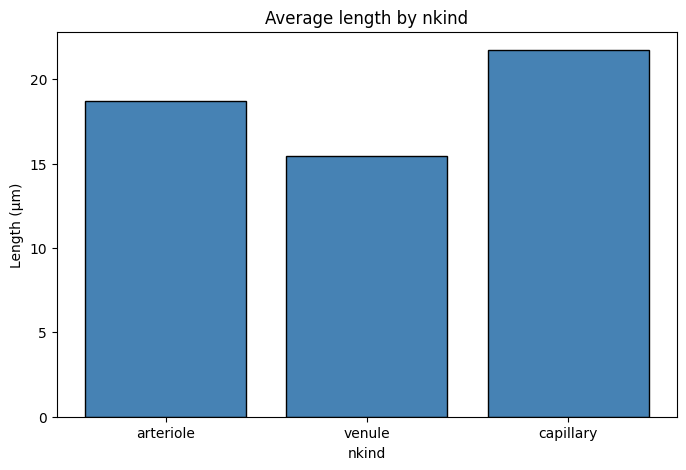

In [18]:
gaf.get_length_nkind(data)
gaf.plot_category_stats(categ=unique_k, attribute_toplot=mean_b, label_dict=vessel_type, xlabel="nkind", ylabel="Length (µm)", title="Average length by nkind")

Histogram for each nkind

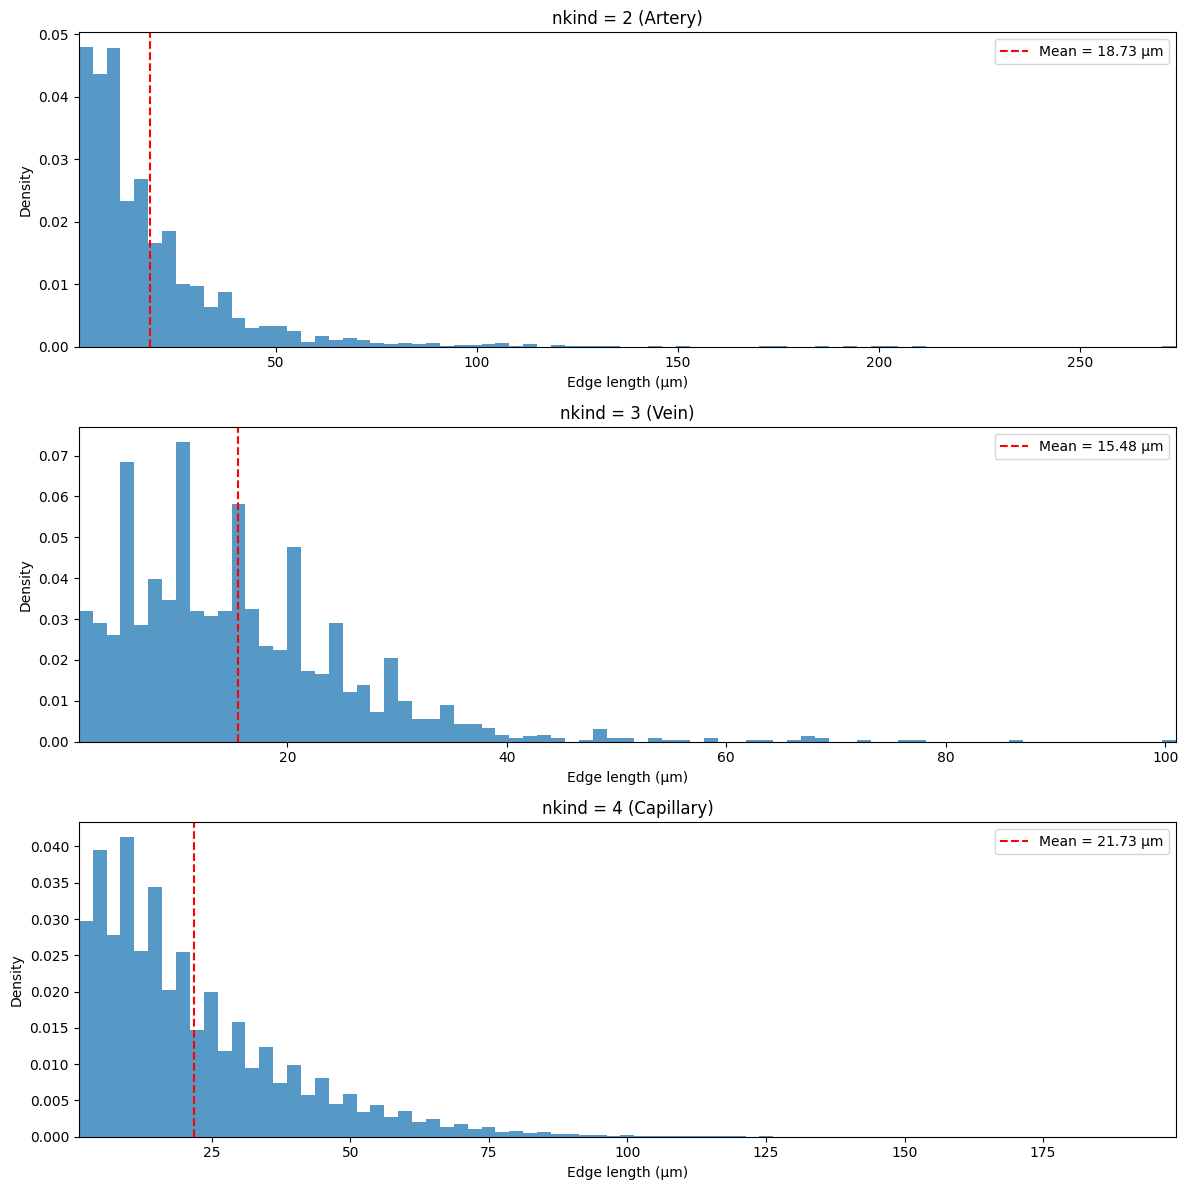

In [19]:
label_dict = {
    2: "Artery",
    3: "Vein",
    4: "Capillary"
}
unique_k = np.unique(nkind)

plt.figure(figsize=(12, 4 * len(unique_k)))  

for i, k in enumerate(unique_k, 1):
    plt.subplot(len(unique_k), 1, i)   # one column, one row per nkind
    subset = length_att[nkind == k]

    # bins adapted to the real range of each nkind
    bins = np.linspace(subset.min(), subset.max(), 80)

    plt.hist(subset, bins=bins, alpha=0.75, density=True)
    
    mean_value = subset.mean()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5)
    
    # x axis limits to match the data range
    plt.xlim(subset.min(), subset.max())
    
    # title codification
    vessel_name = label_dict.get(k, "Unknown")
    plt.title(f"nkind = {k} ({vessel_name})")
    
    plt.xlabel("Edge length (µm)")
    plt.ylabel("Density")
    plt.legend([f"Mean = {mean_value:.2f} µm"])

plt.tight_layout()
plt.show()


OPTION B: 


Example data of length from file [np.float64(28.0), np.float64(38.0), np.float64(8.0), np.float64(30.0), np.float64(31.0), np.float64(17.0), np.float64(29.0), np.float64(17.0), np.float64(11.0), np.float64(5.0)]
Example data of nkind from file [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Num capillaries: 133223
Length capillaries min., max., mean: 1.0 199.0 21.726751386772555
Num arteries: 3066
Length arteries min., max., mean: 1.0 274.0 18.729288975864318
OPTION B:
nkind = 2: average length (att) = 18.729289
nkind = 3: average length (att) = 15.475041
nkind = 4: average length (att) = 21.726751


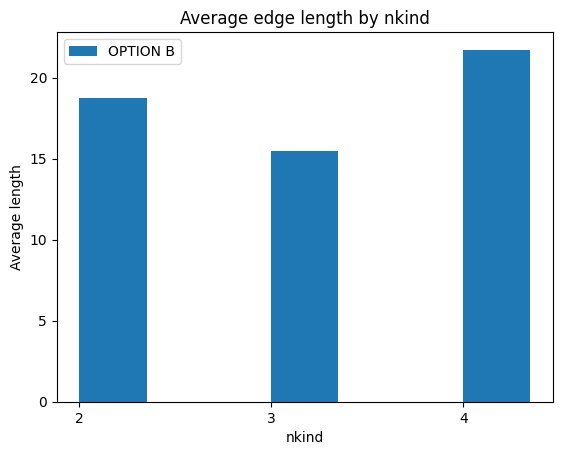

In [20]:
import numpy as np
import matplotlib.pyplot as plt

print("Example data of length from file", data.es["length"][100:110])   
print("Example data of nkind from file", data.es["nkind"][100:110])   



# added this line to analyze if capillaries mean lenght is consistent
length_att = np.array(data.es["length"])
capillaries = length_att[nkind==4]
arteries = length_att[nkind==2]
print("Num capillaries:", len(capillaries))
print("Length capillaries min., max., mean:", capillaries.min(), capillaries.max(), capillaries.mean())
print("Num arteries:", len(arteries))
print("Length arteries min., max., mean:", arteries.min(), arteries.max(), arteries.mean())

# classify by nkind
nkind = np.array(data.es["nkind"])

print("OPTION B:")
for k in np.unique(nkind):
    mean_l = length_att[nkind == k].mean()
  
    print(f"nkind = {k}: average length (att) = {mean_l:.6f}")

# Plot
unique_k = np.unique(nkind)
mean_b = [length_att[nkind == k].mean() for k in unique_k]


x = np.arange(len(unique_k))
width = 0.35


plt.bar(x + width/2, mean_b, width, label='OPTION B')

plt.ticklabel_format(style='sci', axis='y')
# add scilimits for scientific notation
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xticks(x, unique_k)
plt.xlabel("nkind")
plt.ylabel("Average length")
plt.title("Average edge length by nkind")
plt.legend()
plt.show()


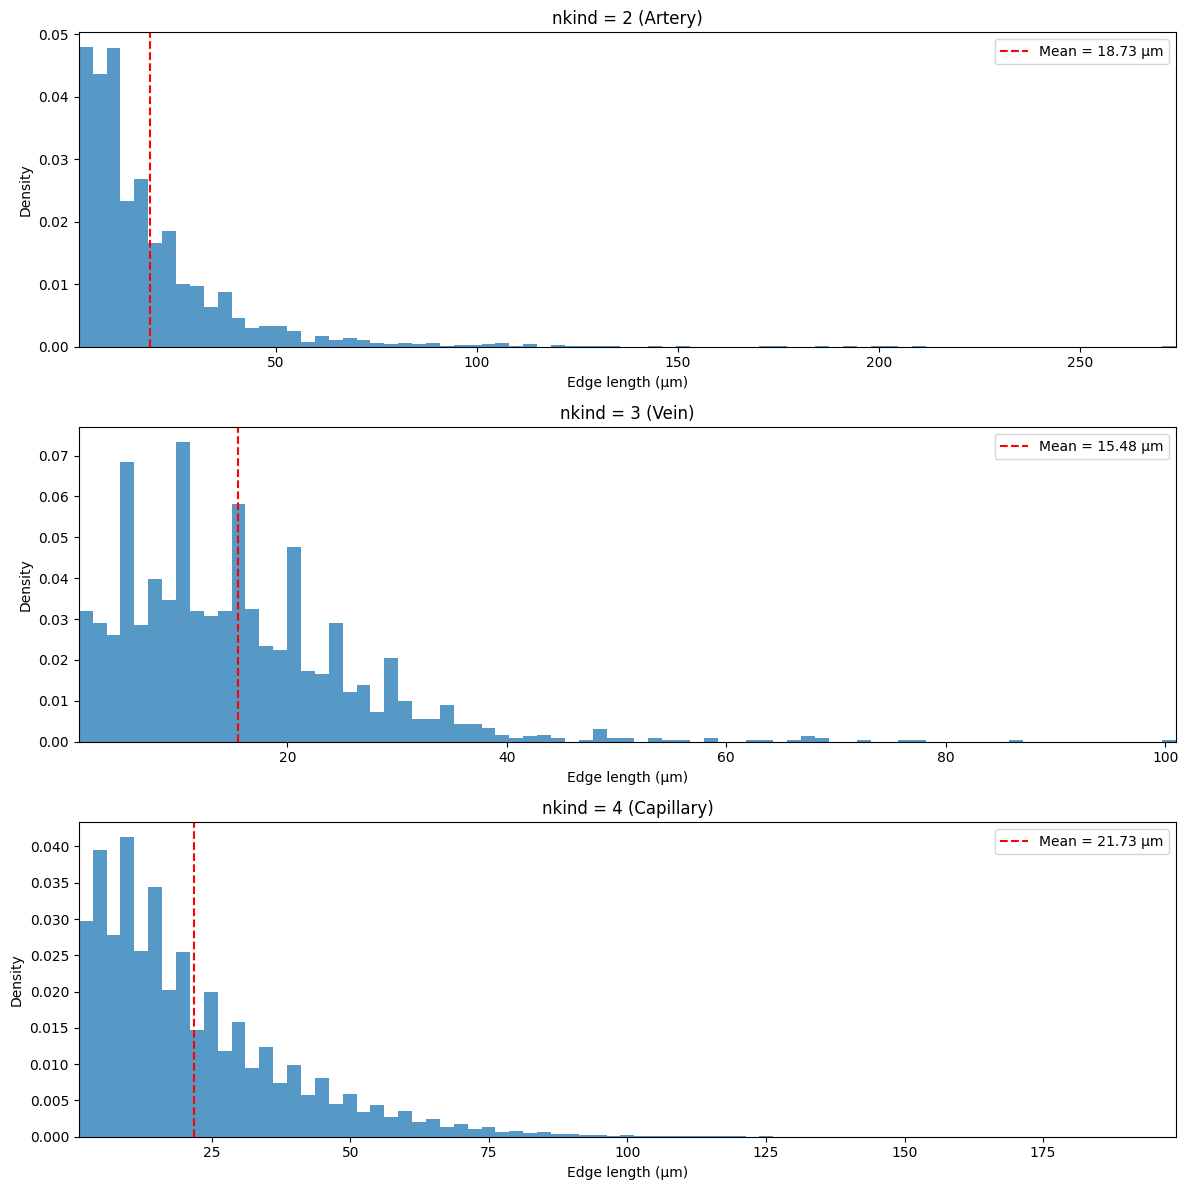

In [21]:
label_dict = {
    2: "Artery",
    3: "Vein",
    4: "Capillary"
}
unique_k = np.unique(nkind)

plt.figure(figsize=(12, 4 * len(unique_k)))  

for i, k in enumerate(unique_k, 1):
    plt.subplot(len(unique_k), 1, i)   # one column, one row per nkind
    subset = length_att[nkind == k]

    # bins adapted to the real range of each nkind
    bins = np.linspace(subset.min(), subset.max(), 80)

    mean_value = subset.mean()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5)
    
    plt.hist(subset, bins=bins, alpha=0.75, density=True)
    
    
    # x axis limits to match the data range
    plt.xlim(subset.min(), subset.max())
    
    # title codification
    vessel_name = label_dict.get(k, "Unknown")
    plt.title(f"nkind = {k} ({vessel_name})")
    
    plt.xlabel("Edge length (µm)")
    plt.ylabel("Density")
    plt.legend([f"Mean = {mean_value:.2f} µm"])

plt.tight_layout()
plt.show()


# 5) Degrees of the nodes? Are there nodes with degree > 3?

Degrees of nodes: [1 2 3 4 5 6 7 8]
Total nodes with degree > 4: 6481
Number of high degree nodes: 6481


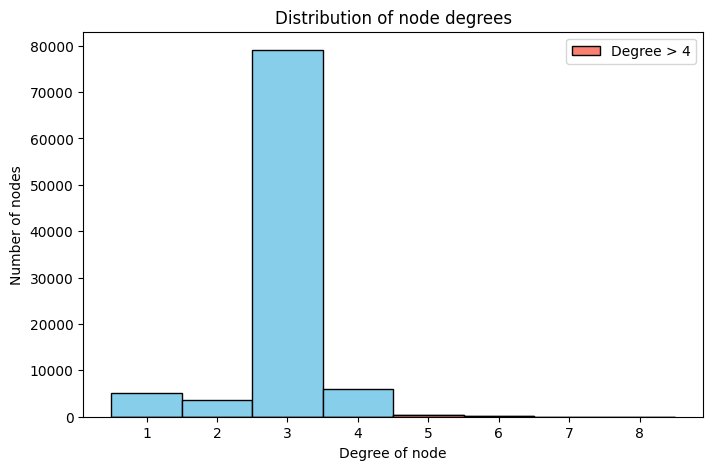

In [22]:
degrees = np.array(data.degree())
print("Degrees of nodes:", np.unique(degrees))

count = 0
threshold = 4

for i, d in enumerate(degrees): # if only want to show x nodes --> degrees[:x]
    if d >= threshold:
        #print(f"Node {i} has degree {d}, nkind: {nkind[i]} ")
        count += 1
       
print(f"Total nodes with degree > {threshold}: {count}")

data.vs["high_degree"] = (degrees >= threshold).astype(int)
# en vez de 1, asociar el num de grados tal cual para luego poder meter en paraview y ver map colores

high_degree_nodes = [i for i,x in enumerate(data.vs["high_degree"]) if x == 1]
print("Number of high degree nodes:", len(high_degree_nodes))

data.write("vascular_graph_with_highdegree.graphml") # usar pkl


# Histogram of degrees
plt.figure(figsize=(8,5))
plt.hist(degrees, bins=np.arange(degrees.min(), degrees.max()+2)-0.5, color='skyblue', edgecolor='k')
plt.xlabel("Degree of node")
plt.ylabel("Number of nodes")
plt.title("Distribution of node degrees")

# Nodes with degree > 3 highlighted in another color
plt.hist(degrees[degrees > threshold], bins=np.arange(degrees.min(), degrees.max()+2)-0.5, 
         color='salmon', edgecolor='k', label=f'Degree > {threshold}')

plt.legend()
plt.xticks(np.arange(degrees.min(), degrees.max()+1))
plt.show()

In [23]:
gaf.get_degrees(data)


 Degrees of nodes: [1 2 3 4 5 6 7 8]

Number of high degree nodes (> 4): 6481


# 6) Nodes with boundary conditions compared to the total number of nodes and location

In [24]:
print(data.vs.attributes()) # we have border vertices, boundary type and boundary value to check BCs
print(data.vs["border_vertices"][:10])  # first 10 entries
print(data.vs["boundaryType"][:10])  # first 10 entries

# OPTION A: check by frontier nodes (always will have a BC if frontier)
frontier_nodes = np.array([fn is not None for fn in data.vs["border_vertices"]])

# OPTION B: check by boundaryType
# booleano de nodos con boundaryType definido (no None)
has_boundary = np.array([bt is not None for bt in data.vs["boundaryType"]])

# OPTION C: check by boundaryValue

# no need to check compliance of both (with 1 is sufficient)
node_with_bc = frontier_nodes & has_boundary

print(f"Nodes with BC: {np.sum(node_with_bc)} of {len(data.vs)}")
# location in the array
print(f"Location of nodes with BC: {np.where(node_with_bc)[0]}")
# get coordinates of these nodes
coords_with_bc = np.array(data.vs["coords"])[node_with_bc]
print("Coordinates of nodes with BC:", coords_with_bc[:5])

coords_all = np.array(data.vs["coords"])

['id', 'coords', 'annotation', 'distance_to_surface', 'radii', 'degree', 'high_degree']


KeyError: 'Attribute does not exist'

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# All nodes in light gray
ax.scatter(coords_all[:,0], coords_all[:,1], coords_all[:,2], color='lightgray', s=10, alpha=0.1)

# Nodes BC in red
ax.scatter(coords_with_bc[:,0], coords_with_bc[:,1], coords_with_bc[:,2], color='red', s=50, alpha=0.8, label='Nodes with BC')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Nodes with Boundary Conditions (3D)")
ax.legend()
plt.show()


In [ ]:
import numpy as np

count_bc = np.sum(node_with_bc)
count_all = len(node_with_bc)

plt.bar(['Normal nodes','Nodes with BC'], [count_all - count_bc, count_bc], color=['lightgray','red'])
plt.ylabel('Number of nodes')
plt.title('Nodes with and without BC')
plt.show()


## 7) DUPLICATED EDGES

In [ ]:
from collections import Counter

edges = data.get_edgelist()

for e in edges:
    edge_counts = Counter(tuple(sorted(e))) # sort to ensure undirected edges are counted the same & tuple for hashability

double_edges = {}
for edge, count in edge_counts.items():
    if count > 1:
        double_edges[edge] = count

num_double_edges = sum(c - 1 for c in edge_counts.values() if c > 1) # number of extra edges beyond the first (duplicates)

print(f"Number of duplicate edges: {num_double_edges}")
print("Duplicate edges: ", double_edges)


In [ ]:
gaf.find_duplicated_edges(data)

## 8) LOOPS

In [ ]:
count = 0
loop_edges = []
for e in data.es:
    if e.source == e.target:
        count += 1
        loop_edges.append(e.index)

perc = len(loop_edges) / data.ecount() * 100
print(f"{perc:.4f}%")
print("Loop edges indices:", loop_edges)
print("Count Loop edges:", len(loop_edges))

## 9) BC NODES 

In [ ]:
# box needs to be the same as in the cut_out.py 
box = dict(
    xmin=0, xmax=1000,
    ymin=0, ymax=1000,
    zmin=0, zmax=1000
)

# graph needs to be the cutted graph !!!
# coords_attr same as coordinates used when cutting (coords = coords image, coords_atlas...)
res = gaf.analyze_bc_for_box(
    data,
    box,
    coords_attr="coords",  # o "coordinates"
    eps=1e-2
)
